In [1]:
import sys, os, glob, warnings, logging
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sw_plotting import change_bar_width, plotCountBar
from sw_utilities import tukeyTest

logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.ERROR)
# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)
# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)

# ignore warnings
warnings.filterwarnings('ignore')

# plotting configuration
font = {'family' : 'Arial',
        'size'   : 7}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

# Make a folder if it is not already there to store exported figures
!mkdir ../jupyter_figures


mkdir: ../jupyter_figures: File exists


In [2]:
input_folder = '../data/190523-CRISPR-KO-SMG-IF-HSP47/'
# Read in 1st dataset

df0 = pd.read_csv(input_folder+'190523-LV-188-control-anti-Hsp47-647-anti-Col4-red-mean-intensity-5478.txt')

# average measurements on different z slices for the same image stack
df = df0.groupby('file_name').describe()['mean_intensity']['mean'].reset_index()
df.rename(columns={'mean': 'mean_intensity'}, inplace=True)

# annotate groups and samples (2 epi buds, 3 and 4 FOVs each, 21 z slices per image stack)
df['groups'] = ['sg-Control']*len(df)
df['gland_id'] = ['1']*3 + ['2']*4
df['sample_id'] = [df.groups[i] + '_' + df.gland_id[i] for i in range(len(df))]

# pass to new variable
df1 = df

# Read in 2nd dataset
df0 = pd.read_csv(input_folder+'190523-LV-228-anti-Hsp47-647-anti-Col4-red-mean-intensity-4974.txt')

# average measurements on different z slices for the same image stack
df = df0.groupby('file_name').describe()['mean_intensity']['mean'].reset_index()
df.rename(columns={'mean': 'mean_intensity'}, inplace=True)

# annotate groups and samples (2 epi buds, 3 and 4 FOVs each, 21 z slices per image stack)
df['groups'] = ['sg1-Serpinh1']*len(df)
df['gland_id'] = ['1']*3 + ['2']*4
df['sample_id'] = [df.groups[i] + '_' + df.gland_id[i] for i in range(len(df))]

# pass to new variable
df2 = df

# Read in 3rd dataset
df0 = pd.read_csv(input_folder+'190523-LV-229-anti-Hsp47-647-anti-Col4-red-mean-intensity-7337.txt')

# average measurements on different z slices for the same image stack
df = df0.groupby('file_name').describe()['mean_intensity']['mean'].reset_index()
df.rename(columns={'mean': 'mean_intensity'}, inplace=True)

# annotate groups and samples (2 epi buds, 2 FOVs each, 21 z slices per image stack)
df['groups'] = ['sg2-Serpinh1']*len(df)
df['gland_id'] = ['1']*2 + ['2']*2
df['sample_id'] = [df.groups[i] + '_' + df.gland_id[i] for i in range(len(df))]

# pass to new variable
df3 = df

# Read in 4th dataset
df0 = pd.read_csv(input_folder+'190523-LV-230-anti-Hsp47-647-anti-Col4-red-mean-intensity-4549.txt')

# average measurements on different z slices for the same image stack
df = df0.groupby('file_name').describe()['mean_intensity']['mean'].reset_index()
df.rename(columns={'mean': 'mean_intensity'}, inplace=True)

# annotate groups and samples (2 epi buds, 3 FOVs each)
df['groups'] = ['sg3-Serpinh1']*len(df)
df['gland_id'] = ['1']*3 + ['2']*3
df['sample_id'] = [df.groups[i] + '_' + df.gland_id[i] for i in range(len(df))]

# pass to new variable
df4 = df

# Concatenate the 2 dataframes and reset the index
df = pd.concat([df1, df2, df3, df4])
df.reset_index(inplace=True)

# Normalize intensities by the average of sg-Control
df['mean_intensity'] = df['mean_intensity'] / df1.mean_intensity.mean()

# Check the header
df.head()


,index,file_name,mean_intensity,groups,gland_id,sample_id
0,0,epi1-1.nd2,1.256417,sg-Control,1,sg-Control_1
1,1,epi1-2.nd2,0.953481,sg-Control,1,sg-Control_1
2,2,epi1-3.nd2,0.941935,sg-Control,1,sg-Control_1
3,3,epi2-1.nd2,1.059278,sg-Control,2,sg-Control_2
4,4,epi2-2.nd2,0.841262,sg-Control,2,sg-Control_2


<AxesSubplot:xlabel='groups', ylabel='mean_intensity'>

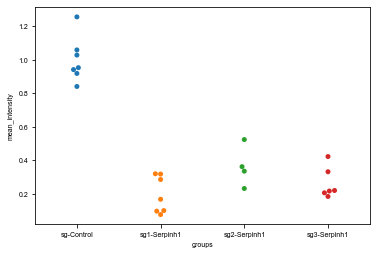

In [3]:
# quick visulization
sns.swarmplot(df.groups, df.mean_intensity)
# sns.barplot(df.groups, df.mean_intensity)

In [4]:
# df.head()
tukeyTest(df.mean_intensity, df.groups)

Summary of test:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
  sg-Control sg1-Serpinh1  -0.8044  0.001 -0.9773 -0.6315   True
  sg-Control sg2-Serpinh1   -0.636  0.001 -0.8388 -0.4332   True
  sg-Control sg3-Serpinh1  -0.7357  0.001 -0.9157 -0.5557   True
sg1-Serpinh1 sg2-Serpinh1   0.1684 0.1256 -0.0344  0.3712  False
sg1-Serpinh1 sg3-Serpinh1   0.0687 0.6934 -0.1112  0.2487  False
sg2-Serpinh1 sg3-Serpinh1  -0.0997 0.5477 -0.3085  0.1091  False
----------------------------------------------------------------
p values of all pair-wise tests:
 [0.001      0.001      0.001      0.12562561 0.69336076 0.54766578]


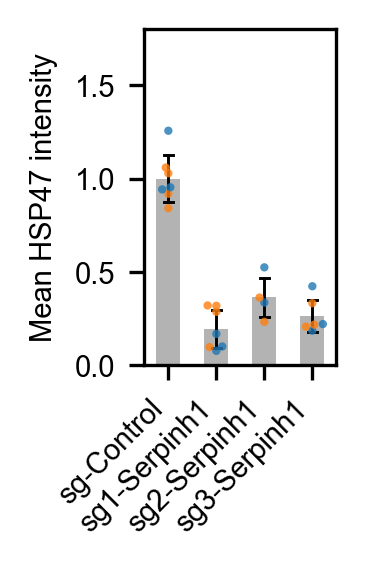

In [5]:
# Swarm plot of 4 categories

outputPrefix = '190523-HSP47-epi-ROI-swarm'
outputFigPath = "../jupyter_figures/" + outputPrefix + ".svg"

fig_width=0.8
fig_height=1.4
fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax = sns.swarmplot(x='groups', y='mean_intensity', data=df,
                   hue='gland_id',
#                    palette={'1': 'red', '2': 'green', '3': 'blue', '4': yellow', '5': 'purple'},
#                    color="blue",
                   size=2.0, alpha=.8)

ax = sns.barplot(x='groups', y='mean_intensity', data=df,
                 color=".7", alpha=1.0,
                 errwidth=.7, errcolor="k", capsize=.2, ci='sd')

plt.ylim(0, 1.8)
# plt.yticks([0, 4, 8])

plt.xlabel(None)
plt.ylabel("Mean HSP47 intensity")

# make the bar width narrower
change_bar_width(ax, .5)

# rotate x tick labels
x_labels = ax.get_xticklabels()
ax.set_xticklabels(labels=x_labels, rotation=45, ha="right")

# Remove legend (symbols representing orgnoids)
ax.get_legend().remove()

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

if outputFigPath is not None:
    plt.savefig(outputFigPath)


In [6]:
# get descriptive stats for all groups
df.groupby('groups').describe()['mean_intensity']

,count,mean,std,min,25%,50%,75%,max
groups,,,,,,,,
sg-Control,7.0,1.000000,0.133765,0.841262,0.930510,0.953481,1.043909,1.256417
sg1-Serpinh1,7.0,0.195582,0.109826,0.077105,0.099136,0.168279,0.302483,0.320450
sg2-Serpinh1,4.0,0.363992,0.120840,0.232612,0.310126,0.349433,0.403299,0.524491
sg3-Serpinh1,6.0,0.264319,0.093387,0.185096,0.209514,0.219051,0.304585,0.423285
